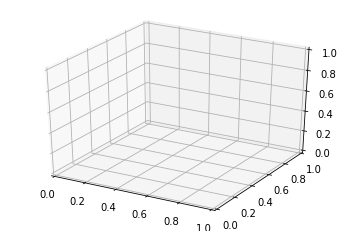

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import util
import random
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


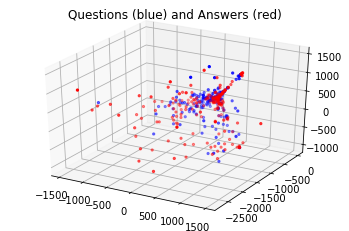

In [6]:
ax = plt.axes(projection='3d')

# returns a dictionary where
# data['texts'] is a list of sentences
# data['tokens'] are the token representation of
# data['texts']
data = util.load_data_dictionary()

# tokens:
# integers representing words
tokens = data['tokens']

# compute svd of tokens
u, s, vh = np.linalg.svd(tokens, full_matrices=True)

r = vh[[2, 0, 1], :]

data_transformed = []

# map tokens into reduced space
for tok in tokens:
    data_transformed.append(np.matmul(r, np.array(tok)))
                            
data_t = np.array(data_transformed)

questions = data_t[::2]
answers = data_t[1::2]

s_questions = []
s_answers = []

# randomly sample questions and answers
# (for a simplified view)
for i in questions:
    if random.randint(0, 1) == 1:
        s_questions.append(i)

for i in answers:
    if random.randint(0, 1) == 1:
        s_answers.append(i)        
s_questions = np.array(s_questions)
s_answers = np.array(s_answers)
        
ax.set_title("Questions (blue) and Answers (red)")
ax.scatter3D(s_questions[:, 0], s_questions[:, 1], s_questions[:, 2], c='r', marker='o', s=5)
ax.scatter3D(s_answers[:, 0], s_answers[:, 1], s_answers[:, 2], c='b', marker='o', s=5)



In [3]:
# complicated sentences make up the border, simple sentences spawn in the center cluster of the cloud